In [1]:
# loading library

import pandas as pd

In [3]:
# loading dataset

# Trying to load the dataset with 'ISO-8859-1' encoding
data = pd.read_csv('global_terrorism.csv', encoding="ISO-8859-1", low_memory=False)

# Understanding the dataset
data_shape = data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [4]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.020000e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.020000e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.020000e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.020000e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.020000e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
DATA CLEANING

In [8]:
missing_values = data.isnull().sum()

In [9]:
# Displaying columns with missing values and their count
missing_values_percentage = (missing_values / data_shape[0]) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_values_percentage
})

missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_data


,Missing Values,Percentage (%)
gsubname3,181671,99.988992
weapsubtype4,181621,99.961473
weapsubtype4_txt,181621,99.961473
weaptype4,181618,99.959822
weaptype4_txt,181618,99.959822
...,...,...
guncertain1,380,0.209146
ishostkid,178,0.097969
specificity,6,0.003302
doubtterr,1,0.000550


In [ ]:
HANDLING MISSING VALUES

In [11]:
# Drop columns with more than 50% missing values
columns_to_drop = missing_values_percentage[missing_values_percentage > 50].index
data_cleaned = data.drop(columns=columns_to_drop)
data_cleaned

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,1.970000e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,1.970000e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,1.970000e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.020000e+11,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,2.020000e+11,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,2.020000e+11,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,0.0,1,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",START Primary Collection,0,0,0,0
181689,2.020000e+11,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.0,0.0,-9,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",START Primary Collection,-9,-9,0,-9


In [13]:
# Fill missing values for other columns based on their data type
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':
        # Fill missing values for categorical columns with a placeholder ('Unknown')
        data_cleaned[column].fillna('Unknown', inplace=True)
    else:
        # Fill missing values for numerical columns with mean
        mean_value = data_cleaned[column].mean()
        data_cleaned[column].fillna(mean_value, inplace=True)

# Removal of Duplicate Rows
data_cleaned.drop_duplicates(inplace=True)

# The dataset is now cleaned, and i saved it as 'terrorism_data'
terrorism_data = data_cleaned
terrorism_data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Unknown,...,0.038944,0.107163,0,0.0,Unknown,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,...,0.038944,0.107163,0,1.0,Unknown,PGIS,0,1,1,1
2,1.970000e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.038944,0.107163,0,0.0,Unknown,PGIS,-9,-9,1,1
3,1.970000e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.038944,0.107163,1,0.0,Unknown,PGIS,-9,-9,1,1
4,1.970000e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.038944,0.107163,1,0.0,Unknown,PGIS,-9,-9,1,1


In [14]:
terrorism_data.tail()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
181686,2.020000e+11,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,2.020000e+11,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,2.020000e+11,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,0.0,1,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",START Primary Collection,0,0,0,0
181689,2.020000e+11,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.0,0.0,-9,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",START Primary Collection,-9,-9,0,-9
181690,2.020000e+11,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,0.0,0,0.0,"""Security tightened in Cotabato following IED ...",START Primary Collection,-9,-9,0,-9


In [ ]:
CHECKING FOR OULIERS USING VISUALISATION METHOD

Matplotlib is building the font cache; this may take a moment.


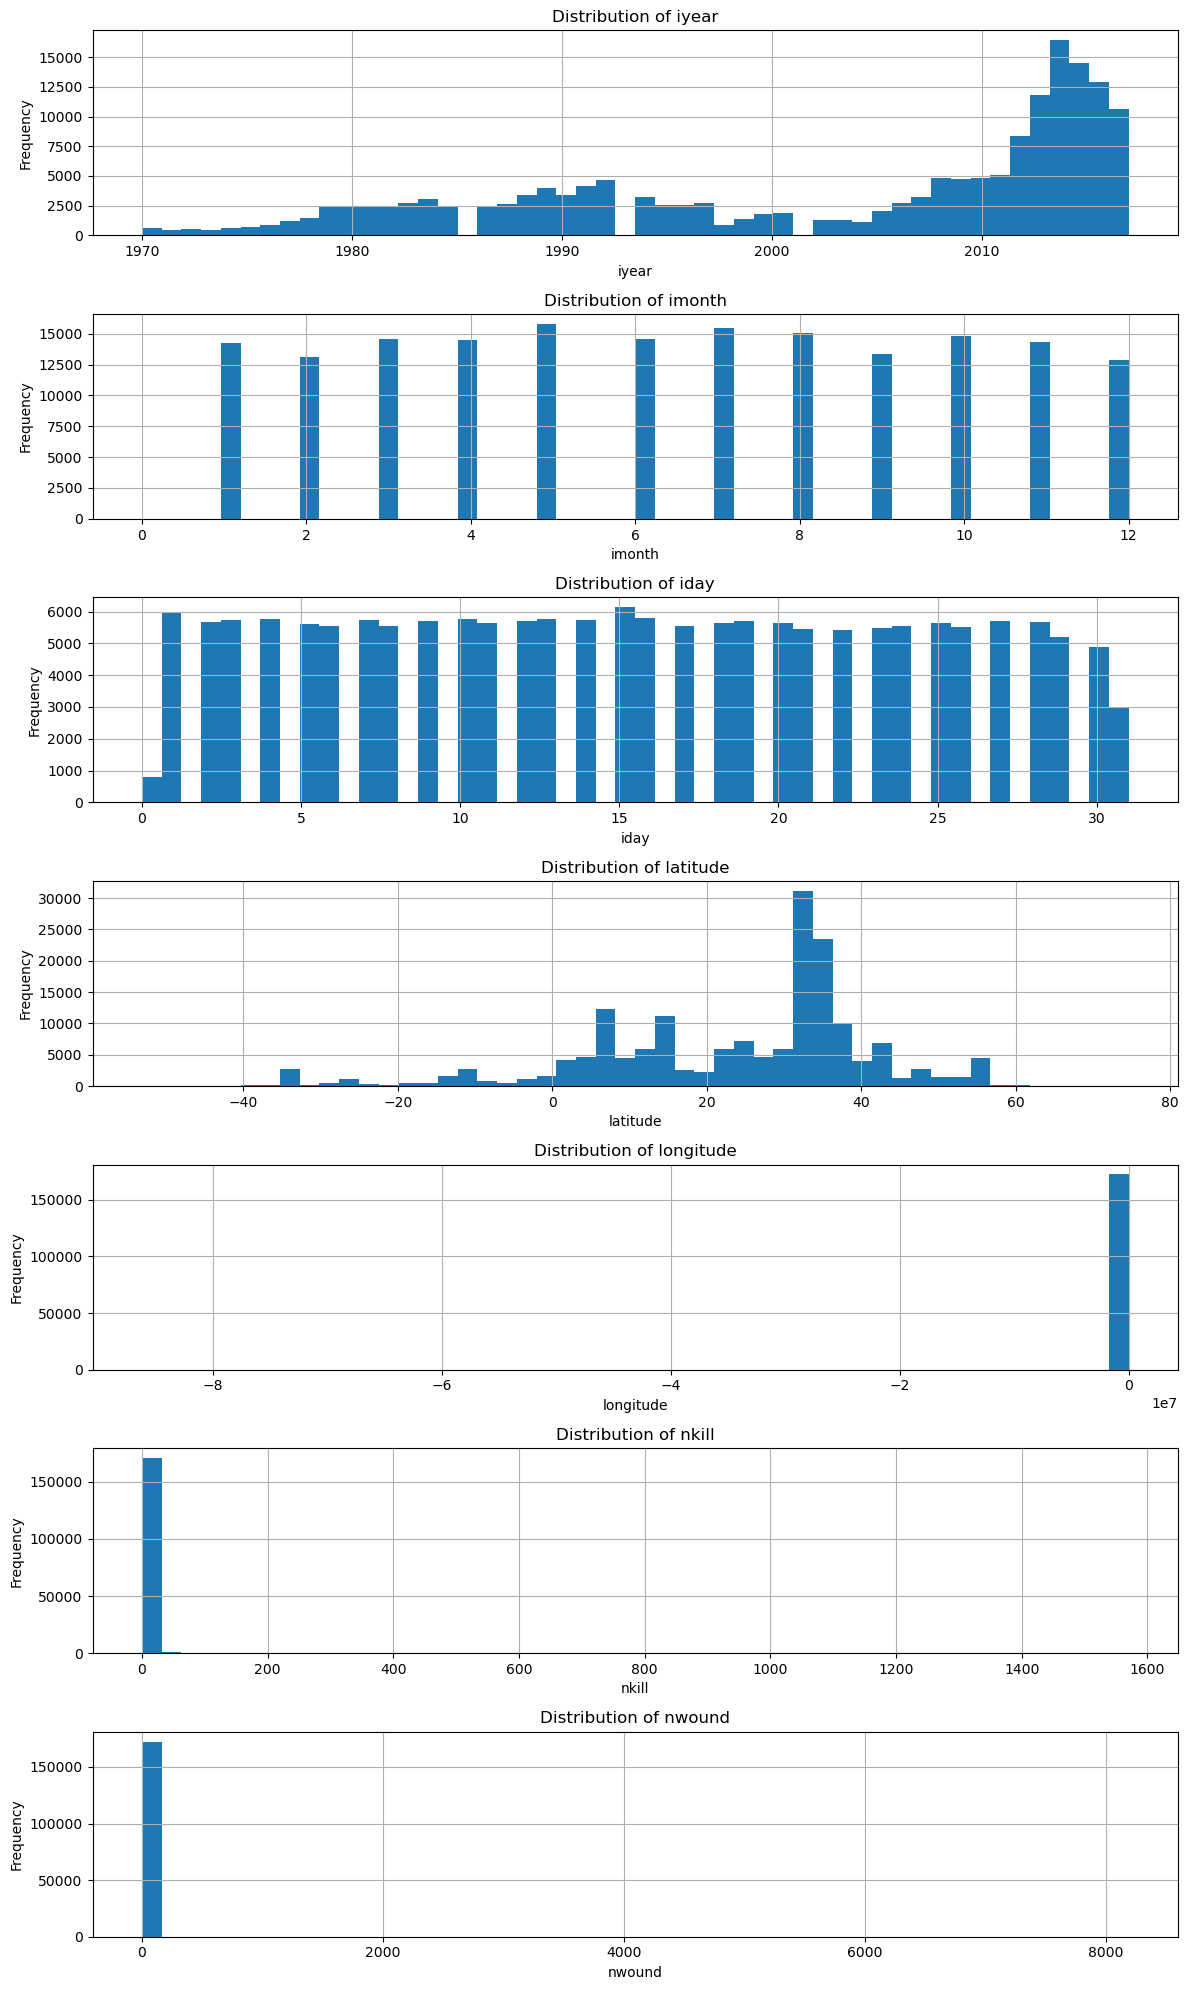

In [15]:
import matplotlib.pyplot as plt

# Selecting a few numerical columns for visualization
columns_to_plot = ['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'nkill', 'nwound']

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(12, 20))

for i, col in enumerate(columns_to_plot):
    terrorism_data[col].dropna().hist(ax=axes[i], bins=50)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [16]:
# Checking the data types of the columns
data_types = terrorism_data.dtypes

# Displaying unique data types and their count
data_types_count = data_types.value_counts()

data_types_count


int64      21
float64    20
object     17
dtype: int64

In [ ]:
VISUALISING TRENDS AND PATTERN

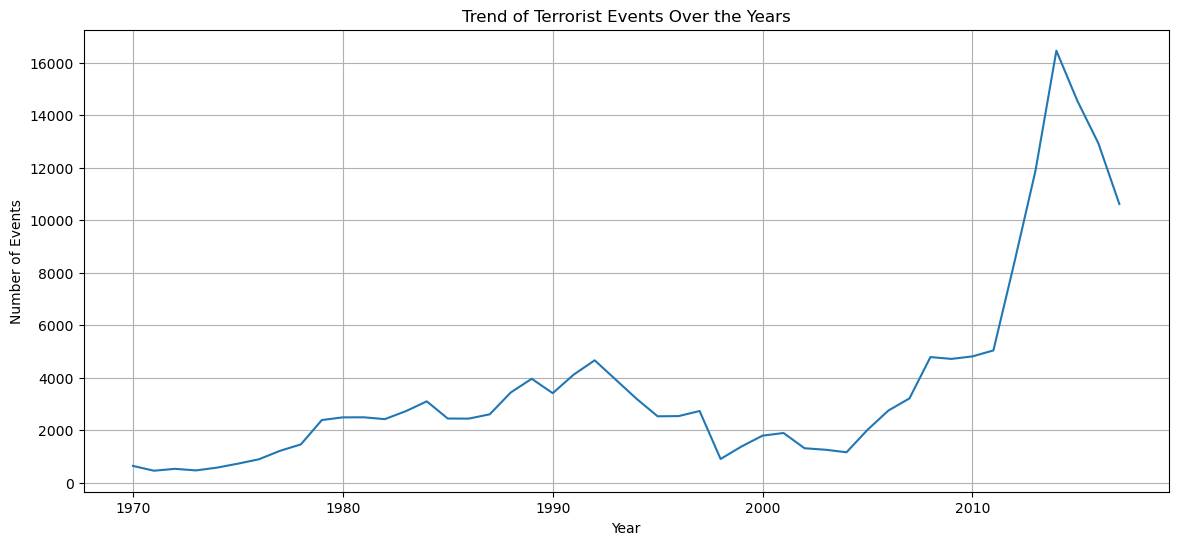

In [17]:
# Trend of terrorist events over the years
yearly_counts = terrorism_data['iyear'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
yearly_counts.plot()
plt.title('Trend of Terrorist Events Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()


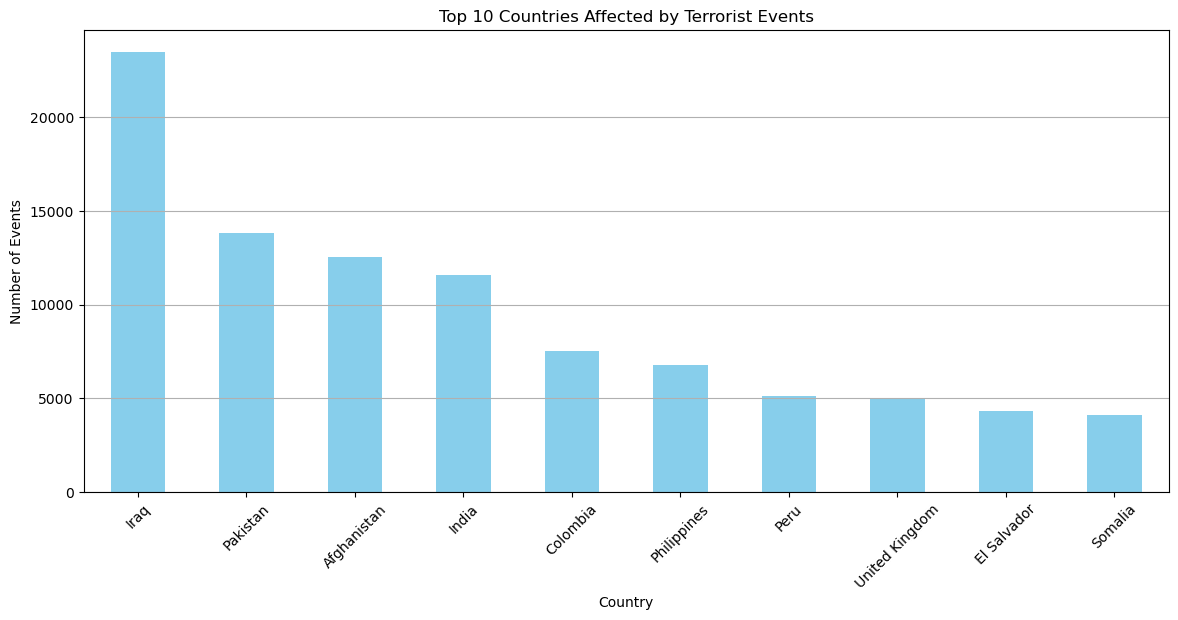

In [18]:
# Top 10 countries affected by terrorist events
top_countries = terrorism_data['country_txt'].value_counts().head(10)

plt.figure(figsize=(14, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries Affected by Terrorist Events')
plt.xlabel('Country')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


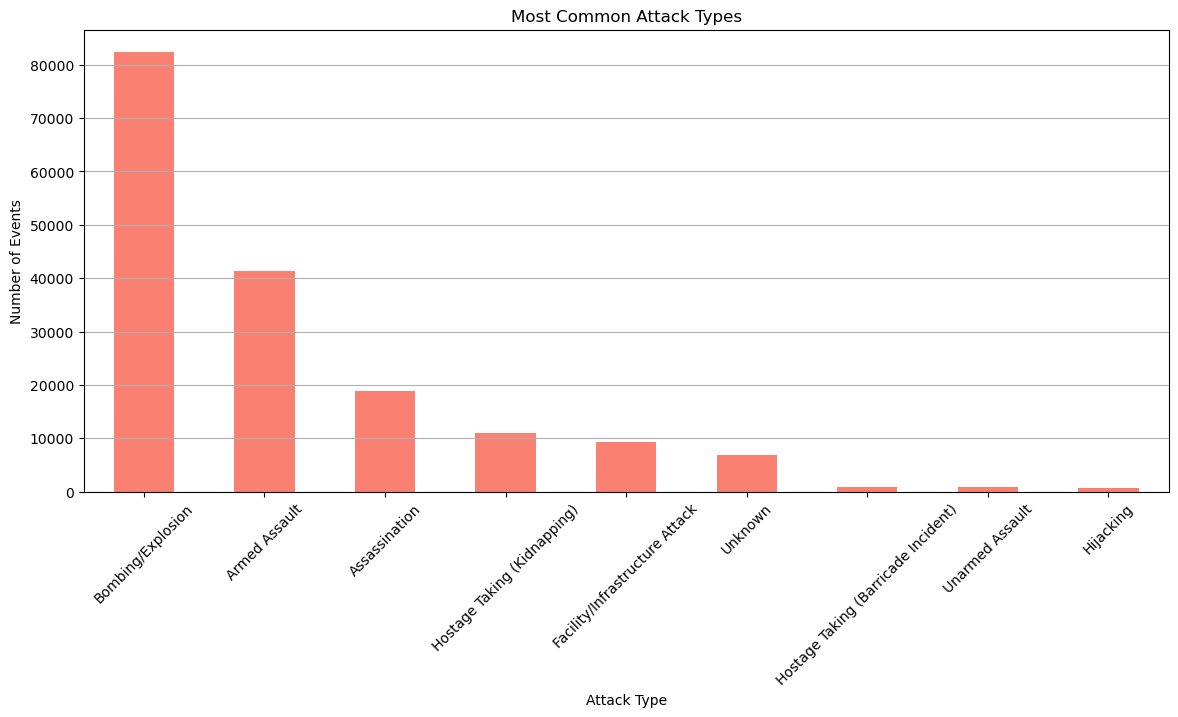

In [19]:
# Most common attack types
attack_types = terrorism_data['attacktype1_txt'].value_counts().head(10)

plt.figure(figsize=(14, 6))
attack_types.plot(kind='bar', color='salmon')
plt.title('Most Common Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
